# Amplitude damping channel

In [35]:
from sympy import I, sqrt, symbols, exp, cos, sin, Symbol, Add, Matrix
from sympy.physics.quantum import TensorProduct as ox

theta, psi = symbols(r"\theta, \phi", real=True)
p = Symbol(r"p", positive=True, real=True)

dpsi = Matrix([0, cos(theta), exp(I * psi) * sin(theta), 0])

M_0 = Matrix([[1, 0], [0, sqrt(1-p)]])
M_1 = Matrix([[0, sqrt(p)], [0, 0]])

rho_ab = Add(*[ox(m_u, m_v) * (dpsi * dpsi.H) * ox(m_u.H, m_v.H) for m_u in [M_0, M_1] for m_v in [M_0, M_1]])

rho_ab

Matrix([
[p*sin(\theta)**2 + p*cos(\theta)**2,                                                                      0,                                                                       0, 0],
[                                  0,                      sqrt(1 - p)*cos(\theta)**2*conjugate(sqrt(1 - p)), sqrt(1 - p)*exp(-I*\phi)*sin(\theta)*cos(\theta)*conjugate(sqrt(1 - p)), 0],
[                                  0, sqrt(1 - p)*exp(I*\phi)*sin(\theta)*cos(\theta)*conjugate(sqrt(1 - p)),                       sqrt(1 - p)*sin(\theta)**2*conjugate(sqrt(1 - p)), 0],
[                                  0,                                                                      0,                                                                       0, 0]])

In [78]:
mt = (M_0 + M_1)
f_psi = ox(mt, mt) * dpsi

f_psi * f_psi.H

Matrix([
[(sqrt(p)*cos(\theta) + sqrt(p)*exp(-I*\phi)*sin(\theta))*(sqrt(p)*exp(I*\phi)*sin(\theta) + sqrt(p)*cos(\theta)), (sqrt(p)*exp(I*\phi)*sin(\theta) + sqrt(p)*cos(\theta))*cos(\theta)*conjugate(sqrt(1 - p)), (sqrt(p)*exp(I*\phi)*sin(\theta) + sqrt(p)*cos(\theta))*exp(-I*\phi)*sin(\theta)*conjugate(sqrt(1 - p)), 0],
[                                sqrt(1 - p)*(sqrt(p)*cos(\theta) + sqrt(p)*exp(-I*\phi)*sin(\theta))*cos(\theta),                                          sqrt(1 - p)*cos(\theta)**2*conjugate(sqrt(1 - p)),                                 sqrt(1 - p)*exp(-I*\phi)*sin(\theta)*cos(\theta)*conjugate(sqrt(1 - p)), 0],
[                    sqrt(1 - p)*(sqrt(p)*cos(\theta) + sqrt(p)*exp(-I*\phi)*sin(\theta))*exp(I*\phi)*sin(\theta),                     sqrt(1 - p)*exp(I*\phi)*sin(\theta)*cos(\theta)*conjugate(sqrt(1 - p)),                                                       sqrt(1 - p)*sin(\theta)**2*conjugate(sqrt(1 - p)), 0],
[                                          

In [72]:
r = Add(*[ox(m_u, m_v) * dpsi for m_u in [M_0, M_1] for m_v in [M_0, M_1]])
r * r.H

Matrix([
[(sqrt(p)*cos(\theta) + sqrt(p)*exp(-I*\phi)*sin(\theta))*(sqrt(p)*exp(I*\phi)*sin(\theta) + sqrt(p)*cos(\theta)), (sqrt(p)*exp(I*\phi)*sin(\theta) + sqrt(p)*cos(\theta))*cos(\theta)*conjugate(sqrt(1 - p)), (sqrt(p)*exp(I*\phi)*sin(\theta) + sqrt(p)*cos(\theta))*exp(-I*\phi)*sin(\theta)*conjugate(sqrt(1 - p)), 0],
[                                sqrt(1 - p)*(sqrt(p)*cos(\theta) + sqrt(p)*exp(-I*\phi)*sin(\theta))*cos(\theta),                                          sqrt(1 - p)*cos(\theta)**2*conjugate(sqrt(1 - p)),                                 sqrt(1 - p)*exp(-I*\phi)*sin(\theta)*cos(\theta)*conjugate(sqrt(1 - p)), 0],
[                    sqrt(1 - p)*(sqrt(p)*cos(\theta) + sqrt(p)*exp(-I*\phi)*sin(\theta))*exp(I*\phi)*sin(\theta),                     sqrt(1 - p)*exp(I*\phi)*sin(\theta)*cos(\theta)*conjugate(sqrt(1 - p)),                                                       sqrt(1 - p)*sin(\theta)**2*conjugate(sqrt(1 - p)), 0],
[                                          

In [70]:
ox(M_0, M_0)

Matrix([
[1,           0,           0,     0],
[0, sqrt(1 - p),           0,     0],
[0,           0, sqrt(1 - p),     0],
[0,           0,           0, 1 - p]])

In [75]:
def baseTrace(m: Matrix, base: int) -> Matrix:
    if not m.is_square:
        raise Exception("Matrix should be square")
    
    s = int(m.shape[0] / (2 / 2**base))
    d = int(m.shape[0] / 2) - base
    return Matrix([[m[i, j] + m[i + d, j + d] for i in range(0, s, base + 1)] for j in range(0, s, base + 1)])

baseTrace(rho_ab, 0).subs(sqrt(1- p).conjugate(), sqrt(1 - p))

(p - 1)**2*cos(\theta)**4 + (-p*sin(\theta)**2 + p + sin(\theta)**2)**2

# Experiment

In [49]:
from qiskit import QuantumCircuit, Aer
from qiskit_experiments.library import StateTomography
from qiskit.quantum_info.operators import Operator, SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session
from qiskit.visualization import array_to_latex, plot_state_city
from qiskit_aer import AerSimulator
from math import pi, cos, sin

In [12]:
theta = pi / 8

A = Operator([
	[cos(2 * theta), sin(2 * theta)],
	[sin(2 * theta), -cos(2 * theta)],
])

qc = QuantumCircuit(2)
qc.append(A, [0])
qc.cx(0, 1)
qc.draw()

┌─────────┐     
q_0: ┤ Unitary ├──■──
     └─────────┘┌─┴─┐
q_1: ───────────┤ X ├
                └───┘

In [25]:
service = QiskitRuntimeService()
estimator = Estimator(backend)

In [ ]:
backend = Aer.get_backend("aer_simulator")

In [52]:
backend = service.get_backend("ibmq_belem")
st = StateTomography(qc)
stdata = st.run(backend, shots=1000).block_for_results()
state_result = stdata.analysis_results("state")
# array_to_latex(state_result.value)
plot_state_city(state_result.value)

RuntimeError: IBMBackend.run() is not supported in the Qiskit Runtime environment.

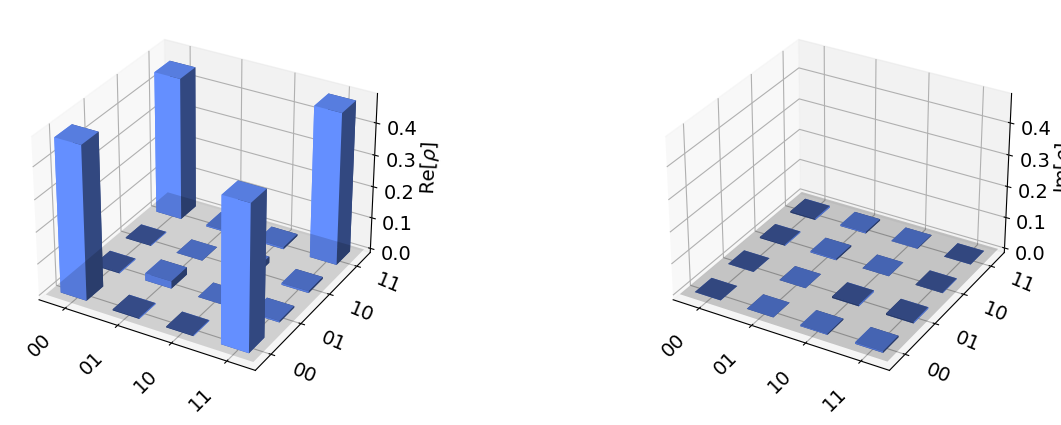

In [51]:
service_backend = service.get_backend("ibmq_belem")
backend = AerSimulator.from_backend(service_backend)

st = StateTomography(qc)
stdata = st.run(backend, shots=10000).block_for_results()
state_result = stdata.analysis_results("state")
# array_to_latex(state_result.value)
plot_state_city(state_result.value)

In [ ]:
service = QiskitRuntimeService()
with Session(service=service, backend="ibmq_belem") as session:
     estimator = Estimator(session=session)
     job = estimator.run(qc, SparsePauliOp("ZZ"))
     result = job.result()
     session.close()

print(result)

In [40]:
array_to_latex(SparsePauliOp("ZZ").to_matrix())

<IPython.core.display.Latex object>

In [39]:
from sympy.physics.matrices import msigma

ox(msigma(3), msigma(3))

Matrix([
[1,  0,  0, 0],
[0, -1,  0, 0],
[0,  0, -1, 0],
[0,  0,  0, 1]])